<a href="https://colab.research.google.com/github/austineDboss/Exercises-and-Projects/blob/master/Avocado_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Avocado King Data Analysis*

In [1]:
#Importing Necessary Libraries for Avocado Data Analysis!
%pylab inline
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import seaborn as sns
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import graphviz
import re
import math
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Reading both the price.csv and googleData file and converting to pandas DataFrame

avocado = pd.read_csv('/content/drive/MyDrive/exercise/prices.csv')
df = pd.DataFrame(avocado) #Contains price and volume Data

In [4]:
google = pd.read_csv('/content/drive/MyDrive/exercise/GoogleData.csv')
gf = pd.DataFrame(google) #Contains number of google searches for keywords relating to avocado

In [5]:
df.head(2) #Analysing the headers for possible errors!

,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta


From the header above the columns TotalVolume is the sum of columns 4046,4225 and 4770. This relationship is similar with TotalBags being the sum of small,large and xlargeBags. This tells that column 4046,4225 and 4770 are small, large and xlarge respectfully!

In [6]:
#Creating a dictionary to map a more readable column name to the Dataframe

price_dict = {'4046' : 'small', '4225' : 'large', '4770' : 'xlarge'}
google_dict = {'avocado: (United States)': 'avocado','Unnamed: 0':'Date','organic: (United States)':'organic','avocado recipe: (United States)':'avocado_recipe',
       'avocado toast: (United States)':'avocado_toast','avocado sandwich: (United States)':'avocado_sandwich','organic avocado: (United States)':'organic_avocado'}

In [7]:
#Renaming the columns using the  above dictionary
df.rename(columns = price_dict, inplace = True)
gf.rename(columns= google_dict, inplace=True)

In [8]:
#replacing the null values and NaN values with the column mean to help with a more balanced DataFrame.
df = df.fillna(df.mean())
gf = gf.fillna(gf.mean())

(array([ 395., 3310., 6664., 7374., 4408., 1994.,  730.,  191.,   85.,
          10.]),
 array([0.44 , 0.721, 1.002, 1.283, 1.564, 1.845, 2.126, 2.407, 2.688,
        2.969, 3.25 ]),
 <a list of 10 Patch objects>)

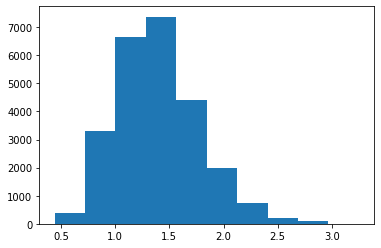

In [9]:
#Histogram showing the average price range of avocado in the US
hist(df['AveragePrice'], )

*From the Histogram above it is noticeable that the averageprice of avocado ranges from about  0.4 to 2.9!*

(array([25., 30., 51., 46., 55., 23.,  8.,  0.,  0.,  1.]),
 array([ 29. ,  36.1,  43.2,  50.3,  57.4,  64.5,  71.6,  78.7,  85.8,
         92.9, 100. ]),
 <a list of 10 Patch objects>)

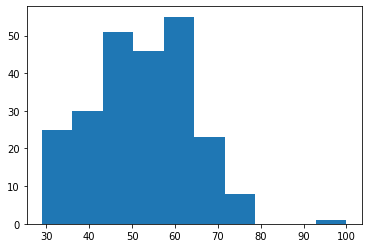

In [10]:
#Showing then number of google_searches for the word *avocado*
hist(gf['avocado'])

From the Histogram above it is noticeable that the number of avocado searches  ranges from about 25 to 100 with the highest frequency being from 60 to 65 searches!

In [11]:
#Checking the dataTypes for the columns
df.dtypes

Date             object
AveragePrice    float64
TotalVolume     float64
small           float64
large           float64
xlarge          float64
TotalBags       float64
SmallBags       float64
LargeBags       float64
XLargeBags      float64
type             object
year              int64
region           object
dtype: object

In [12]:
#Converting the Date Column from object to DateTime datatypes. This will help for fetching specific dates from the dataframe!
gf['Date'] = pd.to_datetime(gf['Date'])
gf = gf.sort_values('Date', ascending=True) 

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date', ascending=True)

# GoogleData.CSV Data Analysis!

Text(0, 0.5, 'avocado_recipe')

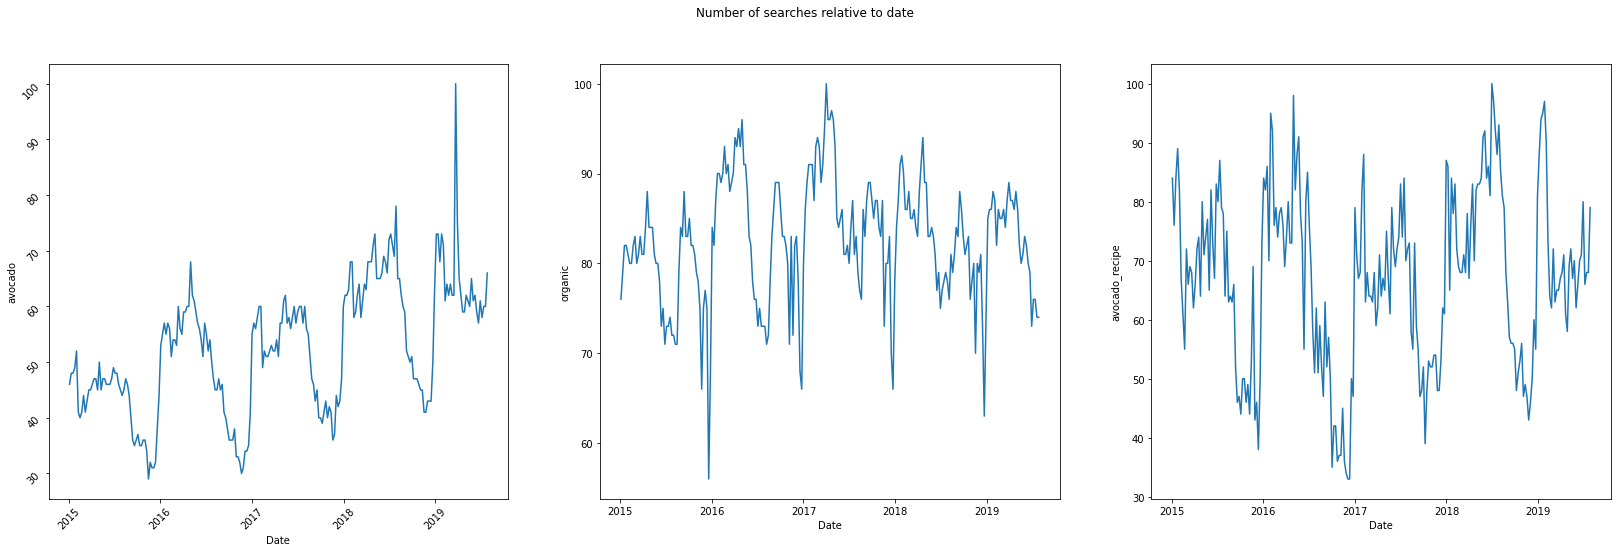

In [13]:
#Creating 3 subplots to show different keyword searches relationship with their respective Dates!
fig, (sub1,sub2,sub3) = plt.subplots(1,3,figsize=(28,8))
fig.suptitle('Number of searches relative to date')
sub1.plot(gf['Date'], gf['avocado'])
sub1.set_xlabel('Date')
sub1.set_ylabel('avocado')
sub1.tick_params(labelrotation=45)
sub2.plot(gf['Date'], gf['organic'])
sub2.set_xlabel('Date')
sub2.set_ylabel('organic')
sub3.plot(gf['Date'], gf['avocado_recipe'])
sub3.set_xlabel('Date')
sub3.set_ylabel('avocado_recipe')

Text(0, 0.5, 'organic_avocado')

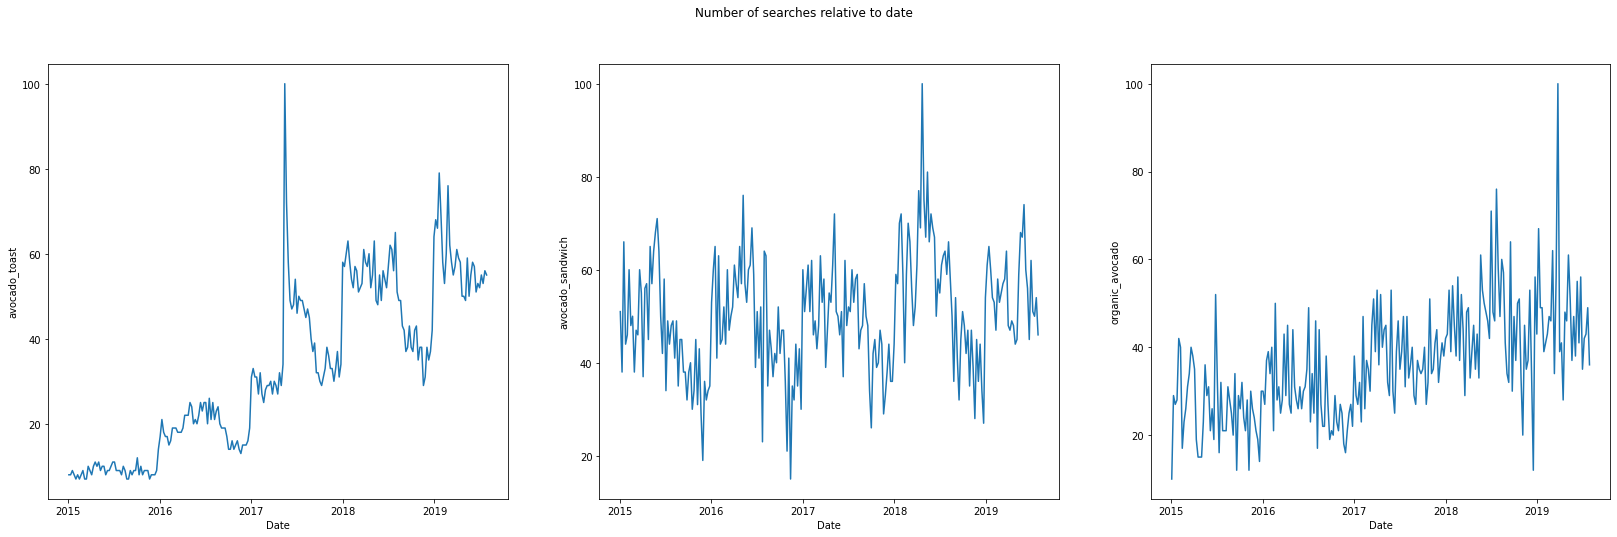

In [14]:
#Creating 3 subplots to show different keyword searches relationship with their respective Dates!
fig, (sub4,sub5,sub6) = plt.subplots(1,3,figsize=(28,8))
fig.suptitle('Number of searches relative to date')
sub4.plot(gf['Date'], gf['avocado_toast'])
sub4.set_xlabel('Date')
sub4.set_ylabel('avocado_toast')
sub5.plot(gf['Date'], gf['avocado_sandwich'])
sub5.set_xlabel('Date')
sub5.set_ylabel('avocado_sandwich')
sub6.plot(gf['Date'], gf['organic_avocado'])
sub6.set_xlabel('Date')
sub6.set_ylabel('organic_avocado')

From the Subplots above there is a visible pattern that is noticeable! The subplots show that the number of google searches for words relating to avocado tend to increase from start of the year towards the middle-year afterwhich it starts to decrease towards the year-end.
 The number of Organic_avocado searches varies alot but over the years it has fairly increased.

In [15]:
#Now fetching day,month and year data from the Date column of the google.csv dataframe 

sortdates = [datetime.datetime.strftime(ts, "%Y-%m-%d") for ts in gf['Date']]
gf['date'] = pd.DataFrame({'date':sortdates})
gf['Year'], gf['Month'], gf['Day'] = gf['date'].str.split('-').str

In [16]:
gf = gf.drop('date', axis=1)

In [17]:
gf.head(1)

,Date,avocado,organic,avocado_recipe,avocado_toast,avocado_sandwich,organic_avocado,Year,Month,Day
0,2015-01-04,46,76,84,8,51,10,2015,01,04


In [18]:
#Now it is possible to group the DataFrame using the year,month or day column
Get_year = gf.groupby("Year")

gf_2015= Get_year.get_group("2015")#this groups the searches of avocado in the year 2015 to a seperate DataFrame
gf_2016= Get_year.get_group("2016")
gf_2017= Get_year.get_group("2017")
gf_2018= Get_year.get_group("2018")

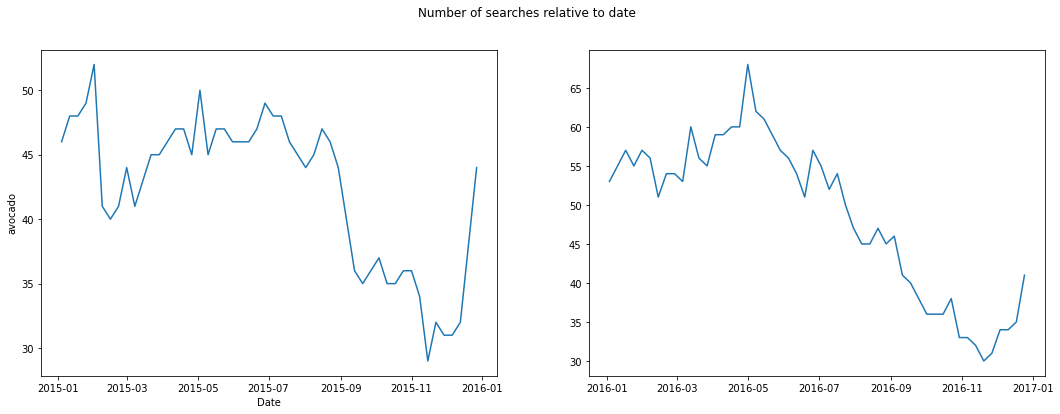

In [19]:
#Now we can observe the subplots of number of avocado searches for the year 2015 and 2016
fig, (sub7,sub8) = plt.subplots(1,2,figsize=(18,6))
fig.suptitle('Number of searches relative to date')
sub7.plot(gf_2015['Date'], gf_2015['avocado'])
sub7.set_xlabel('Date')
sub7.set_ylabel('avocado')
sub8.plot(gf_2016['Date'], gf_2016['avocado'])


Now its visible that avocado searches tend to increase from the mid-november 2015 to July 2016 afterwhich it starts to decrease towards mid- november  again.The graph exposes this certain pattern over the years! 

# Avocado Prices.csv Data Analysis!

In [20]:
#Sorting the Dates of the price.csv dataframe

sorteddates = [datetime.datetime.strftime(ts, "%Y-%m-%d") for ts in df['Date']]
df['date'] = pd.DataFrame({'date':sorteddates})
df['Year'], df['Month'], df['Day'] = df['date'].str.split('-').str

In [21]:
#Grouping the Data based on region

grouped_US = df.groupby('region')

US = grouped_US.get_group('TotalUS') # This sums all the Data from all regions so basically the whole US data
US.set_index('Date', inplace=True)

In [22]:
#Grouping the TotalUS data based on the year for more detailed analysis

grouped_df = US.groupby("year")
df_2015 = grouped_df.get_group(2015)
df_2016 = grouped_df.get_group(2016)
df_2017 = grouped_df.get_group(2017)
df_2018 = grouped_df.get_group(2018)
df_2019 = grouped_df.get_group(2019)

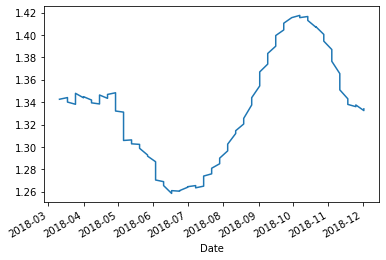

In [23]:
#Plotting the Average price of avocado in the whole US for the year 2018 with a rolling mean to provide smoother graph
df_2018["AveragePrice"].rolling(20).mean().plot()

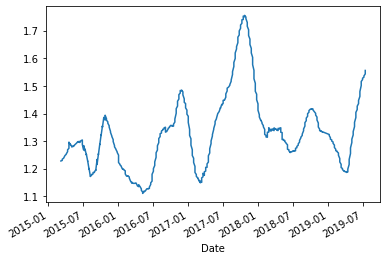

In [24]:
#Plotting the Average price of avocado in the whole US from 2015-2019 with a rolling mean to provide smoother graph
US["AveragePrice"].rolling(20).mean().plot()

In the above graph it is noticeable that the averageprice of avocado increases from middle of the year towards the end of the year and then decreases from beginning of the following year towards the middle of the year. This appears to be a regular pattern which is suprisingly opposite of the avocado search pattern in the previous graphs!

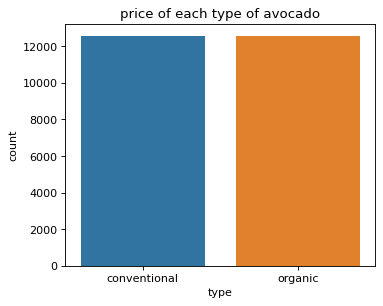

In [25]:
#Showing the number of conventional and organic avocado contained in the DataFrame using seaborn countplot
figure(num=None, figsize=(5, 4), dpi=80, facecolor='w', edgecolor='k')
plt.title('price of each type of avocado')
sns.countplot(df['type'])

From the above graph both types of avocado appears to be the same amount in terms of their frequency. Although their volumes sold might be significantly different.

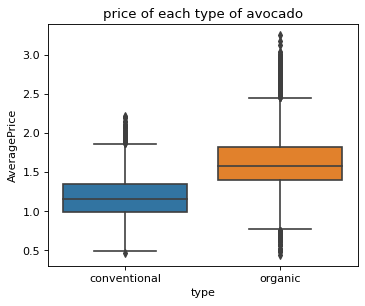

In [26]:
#Comparing the the averageprice of each type of avocado using seaborn boxplot
figure(num=None, figsize=(5, 4), dpi=80, facecolor='w', edgecolor='k')
plt.title('price of each type of avocado')
sns.boxplot(x='type', y='AveragePrice', data=df)

From the boxplot above, organic avocado appears to be more expensive than conventional avocado. This is due to the increased man-power required to produce organic avocado.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text major ticklabel objects>)

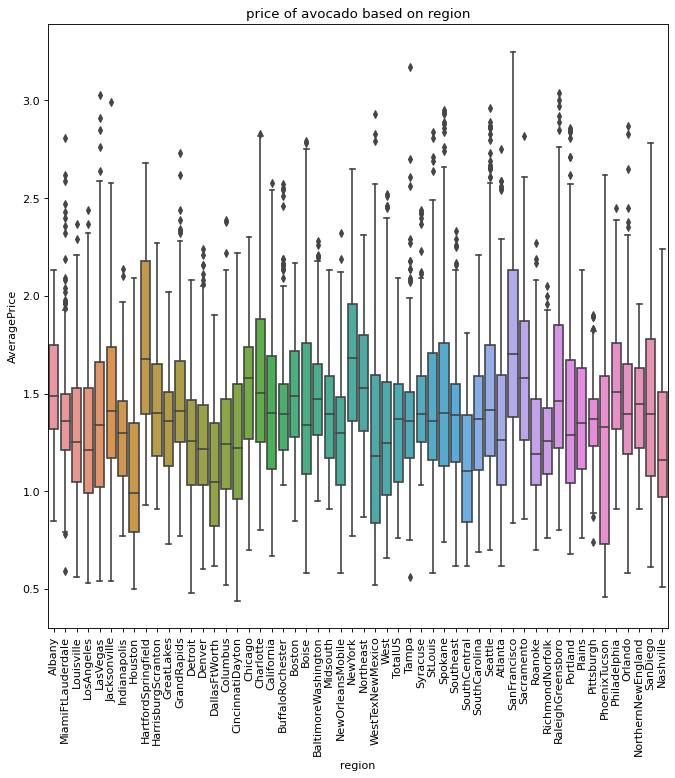

In [27]:
#Comparing the average price of avocado for each region using seaborn boxplot
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('price of avocado based on region')
sns.boxplot(x='region', y='AveragePrice', data=df)
plt.xticks(rotation='vertical')

From the graph above SanFrancisco has the highest selling average for avocado price while Phoenix comes with the lowest selling average. This means its most expensive in SanFrancisco and cheapest in Phoenix.

Text(0.5, 1.0, 'Type Average Price in Each Region')

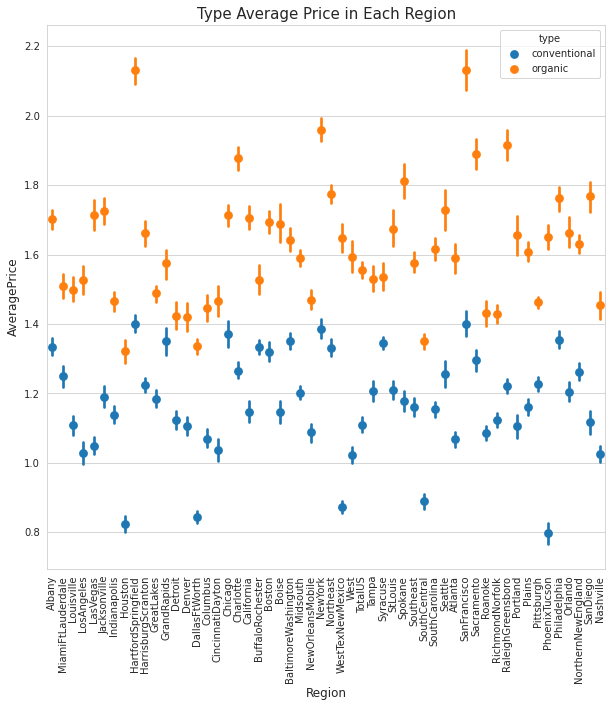

In [28]:
#Comparing average price of each type of avocado per region using seaborn pointplot
plt.figure(figsize=(10,10))
sns.set_style('whitegrid')
sns.pointplot(x='region', y='AveragePrice', data=df, hue='type',join=False)
#plt.xticks(np.linspace(1,2,5))
plt.xticks(rotation='vertical')
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('AveragePrice',{'fontsize':'large'})
plt.title("Type Average Price in Each Region",{'fontsize':15})

From the plot above SanFrancisco still holds highest selling avocado both for organic and coventional, while Phoenix holds cheapest coventional avocado and Huoston holds cheapest organic avocado!

In [29]:
#Dropping rows of data that contains TotalUs to help compare regions which is in the US
New_df = pd.DataFrame(avocado)

indexes_to_drop = []
for index, row in New_df.iterrows():
    if row['region'] == 'TotalUS' :
      indexes_to_drop.append(index)

In [30]:
New_df.drop(New_df.index[indexes_to_drop], inplace=True ) #New Dataframe excluding the totalUS rows

Text(0.5, 1.0, 'Type TotalVolume in Each Region')

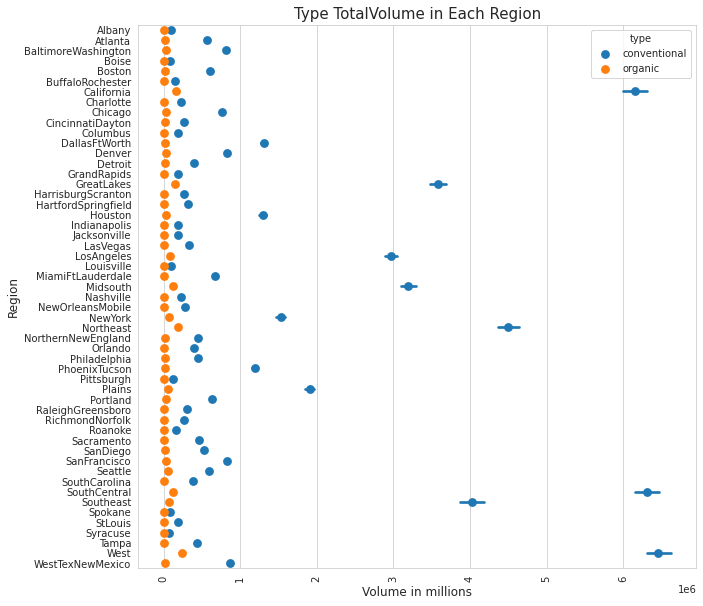

In [31]:
#Showing the totalvolume of the 2 types avocado for each region
plt.figure(figsize=(10,10))
sns.set_style('whitegrid')
sns.pointplot(x='TotalVolume', y='region', data=New_df, hue='type',join=False)
plt.xticks(rotation='vertical')
plt.xlabel('Volume in millions',{'fontsize' : 'large'})
plt.ylabel('Region',{'fontsize':'large'})
plt.title("Type TotalVolume in Each Region",{'fontsize':15})

From the plot above the volume of organic avocado is fairly the same amount for each region while the volume of conventional avocado has some variations in conventional avocado. It is noticeable that regions like West, California, Newyork, West, SouthEast , GreatLakes, LosAngeles and few more consumes higher volumes of avocado than other regions.

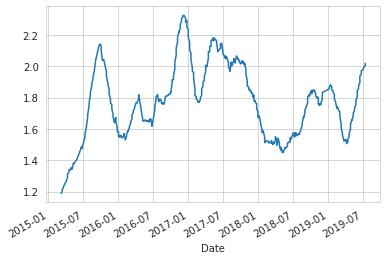

In [32]:
#Getting the SanFrancisco Data to see the average price distribution over the years
sf = grouped_US.get_group('SanFrancisco')
sf.set_index('Date', inplace=True)

sf["AveragePrice"].rolling(20).mean().plot()

From the above graph SanFrancisco follows almost the same pattern as the totalUS data, with a repeated increase in average price during spring and summer seasons followed by a decrease in avocado price during autumn and winter seasons.

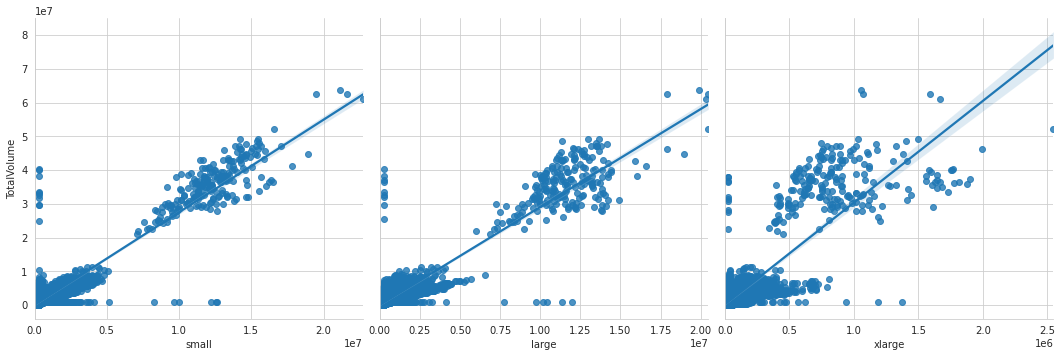

In [33]:
#Showing a pairplot  comparing the totalvolume and totalbags of avocado with their respective small, large and xlarge volume and bags. 
sns.pairplot(data = df, x_vars=['small', 'large', 'xlarge'], y_vars='TotalVolume', size=5, aspect=1, kind='reg')

From the above pairplot we see that the small avocados fits more linearly to the totalvolume of avocados sold while xlarge avocados fits sparsely with the totalvolume. Large avocados comes in the middle.

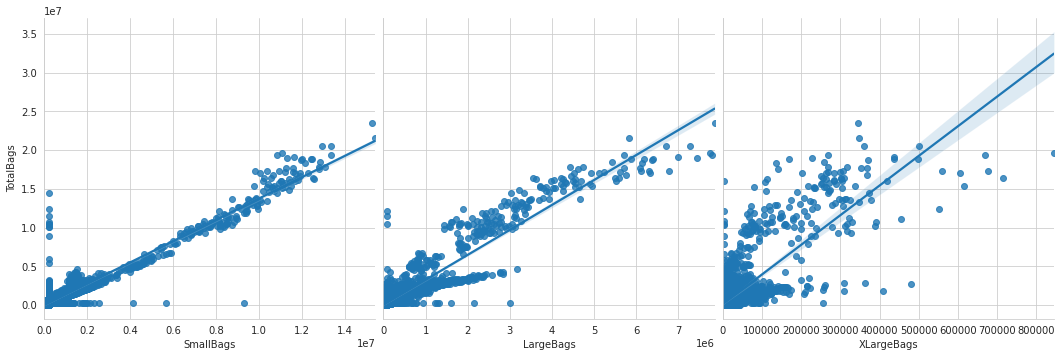

In [34]:
sns.pairplot(data = df, x_vars=['SmallBags', 'LargeBags', 'XLargeBags'], y_vars='TotalBags', size=5, aspect=1, kind='reg')

Small bags of avocado fits more linearly to the totalbags of avocados with xlarge fitting the least and largebags coming in the middle.

# Testing out Machine Learning models for predicting average price and TotalVolume

In [35]:
df = df.sample(frac = 1) #Shuffling the DataFrame to eliminate bias from ordered data

In [36]:
#LabelEncoder for converting categorical data_types to numbers
label = LabelEncoder()
dicts = {}
dic = {}
label.fit(df.type) 
dicts['type'] = list(label.classes_)
df.type = label.transform(df.type)
label.fit(df.region)
dic['region'] = list(label.classes_)
df.region = label.transform(df.region)


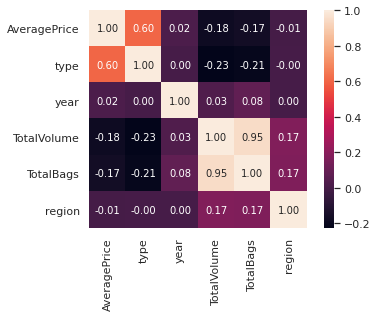

In [37]:
#Showing the correlation between certain columns using the seaborn heatmap
cols = ['AveragePrice','type','year','TotalVolume','TotalBags','region']
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale = 1)
hm = sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':10}, yticklabels = cols, xticklabels = cols)

From the corelation table above Totalvolume seems to have a high correlation to TotalBags(0.95 - 1 )and Averageprice has high correlation to type(1 - 0.6). The other columns are not highly correlated.

**Selecting feature and label Data**

In [38]:
X=df[['small', 'large', 'xlarge', 'SmallBags', 'LargeBags', 'XLargeBags', 'type','region']] #feature columns
Y = df.AveragePrice # Label column

In [39]:
# Splitting the dataset into the Training set and Test set with 70% Training Data and 30% Test Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [40]:
#Fitting Multiple Linear Regression Model to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
model = regressor.fit(X_train, Y_train)

In [41]:
#Predicting the test set results using first model
Y_pred = model.predict(X_test)

In [42]:
#Calculating the mean squared error for the model predictions
MSE_test = (metrics.mean_squared_error(Y_test, Y_pred)) #printing the mean_squared_error of predicted value and test Data
print('Mean squared Error is equal to ',MSE_test)

Mean squared Error is equal to  0.08860253375728329


In [43]:
#Calculating the root mean squared error of the model
RMSE_test = sqrt(MSE_test)
print('Root mean squared Error is equal to',RMSE_test)

Root mean squared Error is equal to 0.2976617774543505


In [44]:
Y_pred = Y_pred.reshape(len(Y_pred),1) #Reshaping the array from horizontal to vertical to match the test_label Dataframe

Text(0, 0.5, 'Actual values')

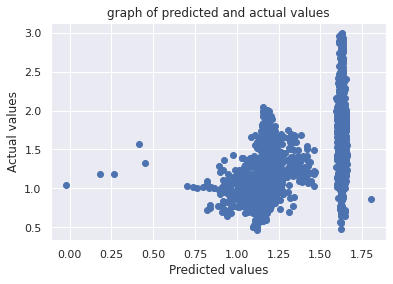

In [45]:
plt.scatter(Y_pred, Y_test) #Scatter plot of predicted values and actual values
plt.title('graph of predicted and actual values')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

From the graph above it is clear that the model is not accurate since we want a more linear distribution of predicted and actual values.

**Random Forest Regression**

In [46]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) #Using RFG model which encompasses 10 different nodes to try and get a more accurate model

In [47]:
model2 = regressor.fit(X_train, Y_train)

In [48]:
pred = model2.predict(X_test)

In [49]:
#Calculating the mean squared error for the model predictions
MSE_test1 = (metrics.mean_squared_error(Y_test, pred)) #printing the mean_squared_error of predicted value and test Data
print('Mean squared Error is equal to ',MSE_test1)

Mean squared Error is equal to  0.043348044792001834


In [50]:
#Calculating the root mean squared error of the model
RMSE_test1 = sqrt(MSE_test1)
print('Root mean squared Error is equal to',RMSE_test1)

Root mean squared Error is equal to 0.20820193272878576


In [51]:
pred = pred.reshape(len(pred),1)

Text(0, 0.5, 'Actual values')

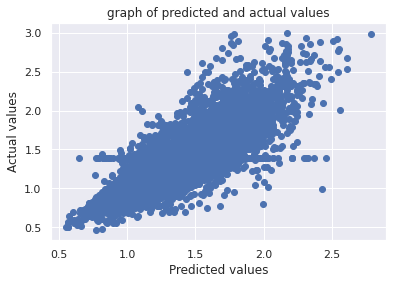

In [52]:
plt.scatter(pred, Y_test)
plt.title('graph of predicted and actual values')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

**the graph above the RandomForestRegressor model is more accurate than the linear regressor model because it produces a more linear distribution of actual values and predicted values. Random forest regressor has a much smaller root mean squared error than the linear model**

# Predicting the Totalvolume of avocados

In [53]:
# tv == totalvolume

x_tv = df[['AveragePrice', 'type','region']] #feature columns
y_tv = df.TotalVolume #label column


In [54]:
# Splitting the dataset into the Training set and Test set with 70% train data and 30% test data
x_tv_train, x_tv_test, y_tv_train, y_tv_test = train_test_split(x_tv, y_tv, test_size = 0.3, random_state = 0)

In [55]:
#Fitting Multiple Linear Regression Model to the training set
regressor = LinearRegression()
model_tv = regressor.fit(x_tv_train, y_tv_train)

In [56]:
#Predicting the test set results
y_tv_pred = model_tv.predict(x_tv_test)

In [57]:
#Calculating the mean squared error for the model predictions
MSE_test2 = (metrics.mean_squared_error(y_tv_test, y_tv_pred)) #printing the mean_squared_error of predicted value and test Data
print('Mean squared Error is equal to ',MSE_test2)

Mean squared Error is equal to  11437314680531.174


In [58]:
#Calculating the root mean squared error of the model
RMSE_test2 = sqrt(MSE_test2)
print('Root mean squared Error is equal to',RMSE_test2)

Root mean squared Error is equal to 3381909.9160875315


In [59]:
y_tv_pred  = y_tv_pred .reshape(len(y_tv_pred ),1)

Text(0, 0.5, 'Actual values')

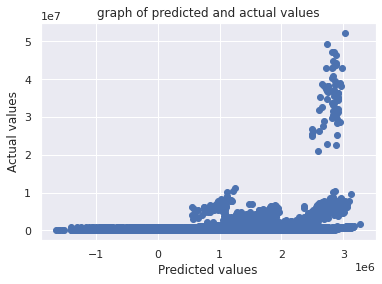

In [60]:
plt.scatter(y_tv_pred, y_tv_test)
plt.title('graph of predicted and actual values')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

From the graph above linear regression model was poor for predicting totalvolume of avocados

**Polynomial Regression for predicting totalvolume of avocados**

In [61]:
#poly == polynomial regression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(x_tv_train)#Transforming the train data to polynomial distribution
model_tv_2 = regressor.fit(X_poly, y_tv_train)

In [62]:
poly_pred = model_tv_2.predict(poly_reg.fit_transform(x_tv_test)) #predicting the transformed test data set to match the training data set

In [63]:
#Calculating the mean squared error for the model predictions
MSE_test3 = (metrics.mean_squared_error(y_tv_test, poly_pred)) #printing the mean_squared_error of predicted value and test Data
print('Mean squared Error is equal to ',MSE_test3)

Mean squared Error is equal to  9841407743512.596


In [64]:
#Calculating the root mean squared error of the model
RMSE_test3 = sqrt(MSE_test3)
print('Root mean squared Error is equal to',RMSE_test3)

Root mean squared Error is equal to 3137101.8063672394


In [65]:
poly_pred  = poly_pred .reshape(len(poly_pred ),1)

Text(0, 0.5, 'Actual values')

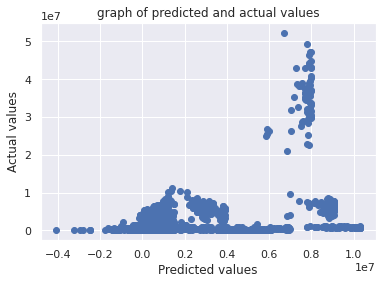

In [66]:
plt.scatter(poly_pred, y_tv_test)
plt.title('graph of predicted and actual values')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

It appears the polynomial regression is more accurate than the linear regression for predicting totalvolume but it is still not accurrate enough as it doesnt show any linear distribution between predicted value and the actual value

---



**Using RandomForest Regression for predicting totalvolume of avocados**

In [67]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)

In [68]:
model_tv_3 = regressor.fit(x_tv_train, y_tv_train)

In [69]:
y_tv_pred1 = model_tv_3.predict(x_tv_test)

In [70]:
#Calculating the mean squared error for the model predictions
MSE_test4 = (metrics.mean_squared_error(y_tv_test, y_tv_pred1)) #printing the mean_squared_error of predicted value and test Data
print('Mean squared Error is equal to ',MSE_test4)

Mean squared Error is equal to  1127965769651.2734


In [71]:
#Calculating the root mean squared error of the model
RMSE_test4 = sqrt(MSE_test4)
print('Root mean squared Error is equal to',RMSE_test4)

Root mean squared Error is equal to 1062057.3287969315


In [72]:
y_tv_pred1 = y_tv_pred1.reshape(len(y_tv_pred1),1)

Text(0, 0.5, 'Actual values')

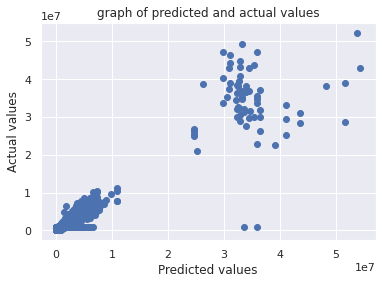

In [73]:
plt.scatter(y_tv_pred1, y_tv_test)
plt.title('graph of predicted and actual values')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

**So Random Forest regressor is again better for predicting the totalvolume of avocados sold as the graph follows a more linear distribution**

# Conclusion

*In conclusion after Testing out 2 models for predicting AveragePrice of Avocado and 3 models for predicting totalvolume of avocados sold. It Appears that Random Forest regressor is the best model for **Avocado king** to make future predictions!*